In [1]:
import numpy as np

In [2]:
rnd = np.random
rnd.seed(1000)

In [3]:
data = [[0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0]]

In [4]:
n = len(data)
Q = 20000 # set to a large number so that vehicle capacity is not an issue
N = [i for i in range(1, n)] 
V = [0] + N
q = {i: rnd.randint(1, 10) for i in N}

In [5]:
loc_x = rnd.rand(len(V))*20000
loc_y = rnd.rand(len(V))*10000

In [6]:
import matplotlib.pyplot as plt

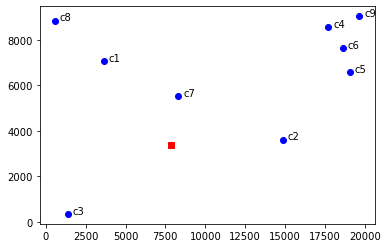

In [7]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('c%d' % (i), (loc_x[i]+300, loc_y[i]))
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.show()

In [8]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): data[i][j] for i, j in A}

In [9]:
A

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8)]

In [10]:
c

{(0, 1): 2451,
 (0, 2): 713,
 (0, 3): 1018,
 (0, 4): 1631,
 (0, 5): 1374,
 (0, 6): 2408,
 (0, 7): 213,
 (0, 8): 2571,
 (0, 9): 875,
 (1, 0): 2451,
 (1, 2): 1745,
 (1, 3): 1524,
 (1, 4): 831,
 (1, 5): 1240,
 (1, 6): 959,
 (1, 7): 2596,
 (1, 8): 403,
 (1, 9): 1589,
 (2, 0): 713,
 (2, 1): 1745,
 (2, 3): 355,
 (2, 4): 920,
 (2, 5): 803,
 (2, 6): 1737,
 (2, 7): 851,
 (2, 8): 1858,
 (2, 9): 262,
 (3, 0): 1018,
 (3, 1): 1524,
 (3, 2): 355,
 (3, 4): 700,
 (3, 5): 862,
 (3, 6): 1395,
 (3, 7): 1123,
 (3, 8): 1584,
 (3, 9): 466,
 (4, 0): 1631,
 (4, 1): 831,
 (4, 2): 920,
 (4, 3): 700,
 (4, 5): 663,
 (4, 6): 1021,
 (4, 7): 1769,
 (4, 8): 949,
 (4, 9): 796,
 (5, 0): 1374,
 (5, 1): 1240,
 (5, 2): 803,
 (5, 3): 862,
 (5, 4): 663,
 (5, 6): 1681,
 (5, 7): 1551,
 (5, 8): 1765,
 (5, 9): 547,
 (6, 0): 2408,
 (6, 1): 959,
 (6, 2): 1737,
 (6, 3): 1395,
 (6, 4): 1021,
 (6, 5): 1681,
 (6, 7): 2493,
 (6, 8): 678,
 (6, 9): 1724,
 (7, 0): 213,
 (7, 1): 2596,
 (7, 2): 851,
 (7, 3): 1123,
 (7, 4): 1769,
 (7, 5): 1

In [11]:
from docplex.mp.model import Model

In [12]:
mdl = Model('CVRP')

In [13]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [14]:
x

{(0, 1): docplex.mp.Var(type=B,name='x_0_1'),
 (0, 2): docplex.mp.Var(type=B,name='x_0_2'),
 (0, 3): docplex.mp.Var(type=B,name='x_0_3'),
 (0, 4): docplex.mp.Var(type=B,name='x_0_4'),
 (0, 5): docplex.mp.Var(type=B,name='x_0_5'),
 (0, 6): docplex.mp.Var(type=B,name='x_0_6'),
 (0, 7): docplex.mp.Var(type=B,name='x_0_7'),
 (0, 8): docplex.mp.Var(type=B,name='x_0_8'),
 (0, 9): docplex.mp.Var(type=B,name='x_0_9'),
 (1, 0): docplex.mp.Var(type=B,name='x_1_0'),
 (1, 2): docplex.mp.Var(type=B,name='x_1_2'),
 (1, 3): docplex.mp.Var(type=B,name='x_1_3'),
 (1, 4): docplex.mp.Var(type=B,name='x_1_4'),
 (1, 5): docplex.mp.Var(type=B,name='x_1_5'),
 (1, 6): docplex.mp.Var(type=B,name='x_1_6'),
 (1, 7): docplex.mp.Var(type=B,name='x_1_7'),
 (1, 8): docplex.mp.Var(type=B,name='x_1_8'),
 (1, 9): docplex.mp.Var(type=B,name='x_1_9'),
 (2, 0): docplex.mp.Var(type=B,name='x_2_0'),
 (2, 1): docplex.mp.Var(type=B,name='x_2_1'),
 (2, 3): docplex.mp.Var(type=B,name='x_2_3'),
 (2, 4): docplex.mp.Var(type=B,nam

In [15]:
u

{1: docplex.mp.Var(type=C,name='u_1',ub=20000),
 2: docplex.mp.Var(type=C,name='u_2',ub=20000),
 3: docplex.mp.Var(type=C,name='u_3',ub=20000),
 4: docplex.mp.Var(type=C,name='u_4',ub=20000),
 5: docplex.mp.Var(type=C,name='u_5',ub=20000),
 6: docplex.mp.Var(type=C,name='u_6',ub=20000),
 7: docplex.mp.Var(type=C,name='u_7',ub=20000),
 8: docplex.mp.Var(type=C,name='u_8',ub=20000),
 9: docplex.mp.Var(type=C,name='u_9',ub=20000)}

In [16]:
mdl.minimize(mdl.sum(c[i, j]*x[i, j] for i, j in A))
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
# mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 26508.000000 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 9 rows and 0 columns.
MIP Presolve modified 36 coefficients.
Aggregator did 36 substitutions.
Reduced MIP has 54 rows, 135 columns, and 270 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.00 sec. (0.28 ticks)
Probing time = 0.00 sec. (0.15 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 54 rows, 135 columns, and 270 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 72 indicators.
Presolve time = 0.00 sec. (0.18 ticks)
Probing time = 0.00 sec. (0.15 ticks)
Clique table members: 54.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.10 ticks)

        Nodes

In [17]:
print(solution)

solution for: CVRP
objective: 6811
x_0_7=1
x_1_4=1
x_2_3=1
x_3_6=1
x_4_5=1
x_5_9=1
x_6_8=1
x_7_2=1
x_8_1=1
x_9_0=1
u_1=35.000
u_2=17.000
u_3=25.000
u_4=36.000
u_5=38.000
u_6=26.000
u_7=9.000
u_8=31.000
u_9=43.000



In [18]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [19]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

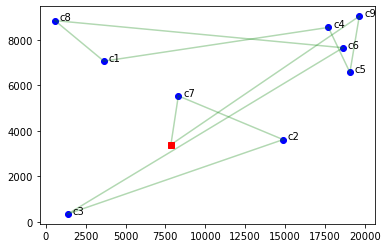

In [20]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')
for i in N:
    plt.annotate('c%d' % (i), (loc_x[i]+300, loc_y[i]))
for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
# plt.axis('equal')
plt.show()